# Data Mining Techniques

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import tqdm

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier

## Task 1

We first load and preprocess the data before we do any analysis or training

In [3]:
df = pd.read_csv("data/ODI-2018.csv")

df.columns = ["timestamp","programme","ml","ir","stats",
              "databases","gender","chocolate","birthday",
              "neighbors","stand up","earnings","random number",
              "bed time","good day 1","good day 2"]

df = df[1:]
df.index = np.arange(df.shape[0])

df

,timestamp,programme,ml,ir,stats,databases,gender,chocolate,birthday,neighbors,stand up,earnings,random number,bed time,good day 1,good day 2
0,4/5/2018 11:22:56,Duisenberg Quantitative Risk Management,no,0,mu,nee,male,neither,10/12/1994,49000,no,0.05,7,1,Productive,Good sleep
1,4/5/2018 11:23:04,Computer Science,no,0,unknown,ja,male,I have no idea what you are talking about,06-08-1993,100,yes,The formmer,394749,1 a m,got a 8.5,got 2 8.5s
2,4/5/2018 11:23:06,Business Analytics,yes,1,sigma,ja,male,neither,25 december 92,5,no,Not enough,6,23,Food,Sport
3,4/5/2018 11:23:50,BA,yes,1,mu,ja,male,I have no idea what you are talking about,01-02-1995,2,no,0,8,0.3,-,-
4,4/5/2018 11:23:59,Master Computer Science: Big Data Engineering,no,0,sigma,ja,male,I have no idea what you are talking about,09.01.1994,6,no,0,8,0:00,sleep,beer
5,4/5/2018 11:24:34,Drug discovery and safety,no,0,mu,nee,male,fat,17-08-1994,4,no,100,No,09:00,Chocolate,Doing nothing
6,4/5/2018 11:25:25,CS,yes,1,mu,nee,male,neither,27-09-1993,5,no,£1,6739,2300,Chocolate,More chocolate
7,4/5/2018 11:25:25,Computational Science,no,0,mu,ja,male,fat,14 May 1994,5,yes,0.25,3,12,Sunshine,Friends
8,4/5/2018 11:25:36,M Financial Economtrics,no,0,mu,nee,male,neither,11-04-1931,2,no,"0,25 pond",78952097,1 AM,Sun,Rain
9,4/5/2018 11:25:51,MSc Bioinformatics and Systems Biology,yes,1,unknown,ja,male,slim,19/08/1993,7,no,0.3,5,2:00,Free time,More free time


## Programme assignment

In [4]:
programme_name = df["programme"].copy()

# Weed out any programme name from keywords
for i in range(len(programme_name)):
    programme_name[i] = programme_name[i].lower()
    name = programme_name[i]
    
    if "computer" in name:
        programme_name[i] = "cs"
    if "big data" in name:
        programme_name[i] = "cs"
    elif "computational" in name:
        programme_name[i] = "cls"
    elif "comoputational" in name:
        programme_name[i] = "cls"
    elif "csl" in name:
        programme_name[i] = "cls"
    elif "bioinf" in name:
        programme_name[i] = "bioinformatics"
    elif "bionf" in name:
        programme_name[i] = "bioinformatics"
    elif "artificial intelligence" in name:
        programme_name[i] = "ai"
    elif "ai" in name:
        programme_name[i] = "ai"
    elif "a. i." in name:
        programme_name[i] = "ai"
    elif "business analytics" in name:
        programme_name[i] = "ba"
    elif "econometrics" in name:
        programme_name[i] = "econometrics"
    elif "eor" in name:
        programme_name[i] = "econometrics"
    elif "qrm" in name:
        programme_name[i] = "qrm"
    elif "quantitative risk" in name:
        programme_name[i] = "qrm"

# Label the rest with other
main = ["ai","ba","bioinformatics","cls","cs","econometrics","qrm"]
for i in range(len(programme_name)):
    if programme_name[i] not in main:
        programme_name[i] = "other"

programme_name.value_counts()

ai                51
ba                44
bioinformatics    28
cls               23
other             22
cs                21
econometrics      18
qrm               10
Name: programme, dtype: int64

## Transformation categorical values

In [5]:
# Encode all categorical values using one-hot encoding
programme = pd.get_dummies(programme_name,prefix = "programme")
ml = pd.get_dummies(df.ml,prefix = "ml")
ir = pd.get_dummies(df.ir,prefix = "ir")
stats = pd.get_dummies(df.stats,prefix = "stats")
databases = pd.get_dummies(df.databases,prefix = "databases")
gender = pd.get_dummies(df.gender,prefix = "gender")
chocolate = pd.get_dummies(df.chocolate,prefix = "chocolate")
stand_up = pd.get_dummies(df["stand up"],prefix = "stand_up")

## Extract neighbors feature

In [6]:
df["neighbors"].value_counts()

1                                                                      38
2                                                                      33
7                                                                      23
6                                                                      21
5                                                                      19
8                                                                      17
3                                                                      16
4                                                                      16
0                                                                       7
10                                                                      4
9                                                                       3
400                                                                     3
300                                                                     2
420                                   

In [7]:
neighbors_str = df["neighbors"].copy()

for i in range(len(neighbors_str)):
    match = re.search("[0-9]+",neighbors_str[i])
    
    if match:
        number = match.group()
        if int(number) > 10:
            neighbors_str[i] = "Unknown"
        else:
            neighbors_str[i] = number
    else:
        neighbors_str[i] = "Unknown"

neighbors = pd.get_dummies(neighbors_str,prefix="neighbors")

neighbors.head()

,neighbors_0,neighbors_1,neighbors_10,neighbors_2,neighbors_3,neighbors_4,neighbors_5,neighbors_6,neighbors_7,neighbors_8,neighbors_9,neighbors_Unknown
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


## Distribution of random numbers

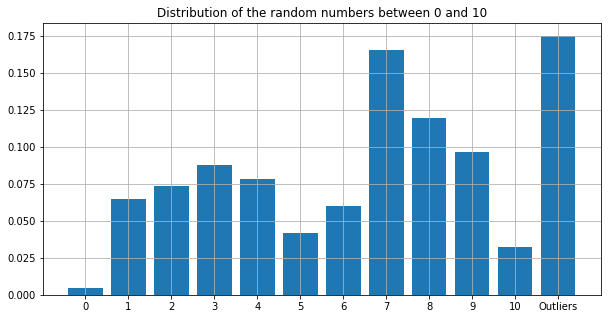

In [8]:
randomNumbers = df["random number"].copy()

nums = np.zeros(12)
for i in range(len(randomNumbers)):
    number = randomNumbers[i]
    if not number.isdigit() or int(number) < 0 or int(number) > 10:
        nums[11] += 1
        randomNumbers[i] = 11
    else:
        nums[int(number)] += 1
        randomNumbers[i] = int(number)
        
plt.figure(figsize=(10,5))
plt.title("Distribution of the random numbers between 0 and 10")
plt.bar(np.arange(12),nums / np.sum(nums))
plt.grid(True)
plt.xticks(np.arange(12),list(range(0,11))+["Outliers"])
plt.show()

# One hot encoding for the random numbers
randLabels = pd.get_dummies(randomNumbers,prefix="random_number")
randLabels.rename(columns={"random_number_11":"random_number_outlier"},inplace=True)

## Chocolate answers by gender

In [9]:
gender.head()

,gender_female,gender_male,gender_unknown
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [10]:
chocolate.head()

,chocolate_I have no idea what you are talking about,chocolate_fat,chocolate_neither,chocolate_slim,chocolate_unknown
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0


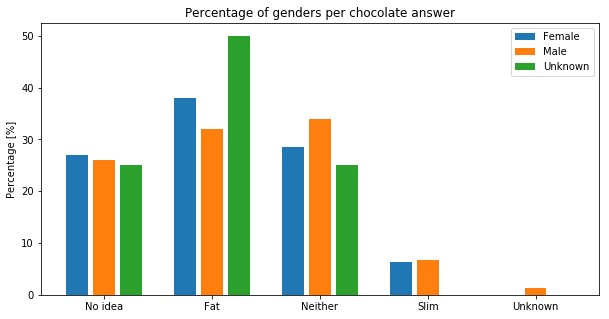

In [11]:
gender_array = np.argmax(gender.values,axis=1)
chocolate_array = np.argmax(chocolate.values,axis=1)

answer_female = np.empty(5)
answer_male = np.empty(5)
answer_unknown = np.empty(5)
for i in range(5):
    answer_female[i] = chocolate_array[np.where(chocolate_array[gender_array == 0] == i)].size
    answer_male[i] = chocolate_array[np.where(chocolate_array[gender_array == 1] == i)].size
    answer_unknown[i] = chocolate_array[np.where(chocolate_array[gender_array == 2] == i)].size

female_x = np.arange(0,17,4)
male_x = np.arange(1,18,4)
unknown_x = np.arange(2,19,4)

plt.figure(figsize=(10,5))
plt.title("Percentage of genders per chocolate answer")
plt.ylabel("Percentage [%]")

plt.bar(female_x,100 * answer_female / np.sum(answer_female),label="Female")
plt.bar(male_x,100 * answer_male / np.sum(answer_male),label="Male")
plt.bar(unknown_x,100 * answer_unknown / np.sum(answer_unknown),label="Unknown")

plt.xticks(male_x,["No idea","Fat","Neither","Slim","Unknown"])
plt.legend()
plt.show()

## Number of gendered individuals per programme

In [12]:
programme.head()

,programme_ai,programme_ba,programme_bioinformatics,programme_cls,programme_cs,programme_econometrics,programme_other,programme_qrm
0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0


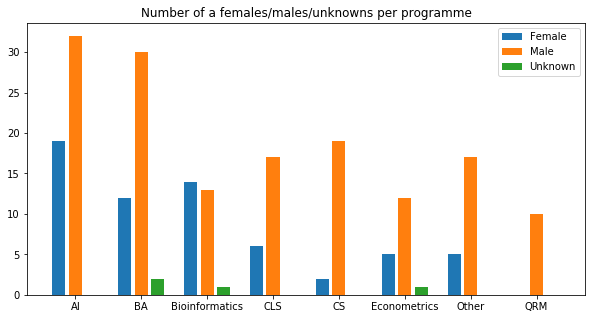

In [13]:
gender_array = np.argmax(gender.values,axis=1)
programme_array = np.argmax(programme.values,axis=1)

programme_female = np.empty(8)
programme_male = np.empty(8)
programme_unknown = np.empty(8)
for i in range(8):
    programme_female[i] = programme_array[np.where(programme_array[gender_array == 0] == i)].size
    programme_male[i] = programme_array[np.where(programme_array[gender_array == 1] == i)].size
    programme_unknown[i] = programme_array[np.where(programme_array[gender_array == 2] == i)].size

female_x = np.arange(0,29,4)
male_x = np.arange(1,30,4)
unknown_x = np.arange(2,31,4)

plt.figure(figsize=(10,5))
plt.title("Number of a females/males/unknowns per programme")

plt.bar(female_x,programme_female,label="Female")
plt.bar(male_x,programme_male,label="Male")
plt.bar(unknown_x,programme_unknown,label="Unknown")

plt.xticks(male_x,["AI","BA","Bioinformatics","CLS","CS","Econometrics","Other","QRM"])
plt.legend()
plt.show()

## Good day string average length transformation

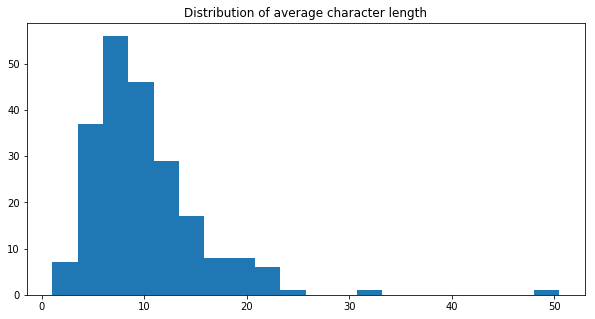

In [14]:
good_day_1 = df["good day 1"]
good_day_2 = df["good day 2"]

good_day_length = pd.Series(np.zeros(len(good_day_1)) , name = 'good day length')

for i in range(len(good_day_length)):
    good_day_length[i] = (len(good_day_1[i]) + len(good_day_2[i])) / 2

plt.figure(figsize=(10,5))
plt.title("Distribution of average character length")
plt.hist(good_day_length.values,20)
plt.show()

## Birth date attributes retrieval from birthdays

In [15]:
birthday = df["birthday"].copy()

d = pd.Series(np.zeros(df.shape[0],dtype=int),name="birthdate_d")
m = pd.Series(np.zeros(df.shape[0],dtype=int),name="birthdate_m")
y = pd.Series(np.zeros(df.shape[0],dtype=int),name="birthdate_y")

birthdate = pd.concat([d,m,y],axis=1)

months = ["january","february","march","april","may","june",
          "july","august","september","october","november","december"]

for i in range(len(birthday)):
    text = birthday[i]
    
    for char in ["/","."]:
        text = text.replace(char,"-")
    
    match_date = re.search("[0-9]{1,4}-[0-9]{1,2}(-[0-9]{2,4})?",text)
    
    if match_date:
        date = match_date.group().split("-")
        
        if len(date) == 3:
            first,second,third = date
            
            month = int(second)
            
            if int(first) > 31:                
                day = int(third)
                year = first
            else:
                day = int(first)
                year = third
            
            if int(year) < 100:
                year = int("19"+year)
            else:
                year = int(year)
                        
            if day <= 31:
                birthdate["birthdate_d"][i] = day
            
            if month <= 12:
                birthdate["birthdate_m"][i] = month
            
            if year > 1950 and year < 2000:
                birthdate["birthdate_y"][i] = year
            
        elif len(date) == 2:
            first,second = date
            
            day = int(first)
            month = int(second)
            
            if day <= 31:
                birthdate["birthdate_d"][i] = day
            
            if month <= 12:
                birthdate["birthdate_m"][i] = month
    
    else:
        text = text.lower()
        text = text.replace("februari","february")
        text = text.replace("aug","august")
        text = text.replace("augustust","august")
        text = text.replace("th","")
        
        tokens = text.split(" ")
        for token in tokens:
            for m in range(len(months)):
                if months[m] in token:
                    birthdate["birthdate_m"][i] = m + 1
        
            if re.search("[0-9]",token):
                number = int(token)
                if number > 31:
                    if number > 1900 and number < 2000:
                        birthdate["birthdate_y"][i] = number
                    elif number < 100:
                        birthdate["birthdate_y"][i] = float("19"+token)
                elif len(tokens) > 1:
                    birthdate["birthdate_d"][i] = number


# Set NaN for missing years
birthdate["birthdate_y"][birthdate["birthdate_y"] == 0] = np.nan

age = 2018 - birthdate["birthdate_y"]

average_age = age.mean()
age.name = "Age"
age.fillna(average_age,inplace=True)

birthdate["birthdate_y"].fillna(2018 - average_age,inplace=True)

birthdate["birthdate_m"].value_counts()

9     22
12    21
11    20
3     19
10    18
8     17
2     17
1     17
4     16
5     15
6     13
0     13
7      9
Name: birthdate_m, dtype: int64

In [16]:
birthdate_d = pd.get_dummies(birthdate["birthdate_d"],prefix="day")
birthdate_m = pd.get_dummies(birthdate["birthdate_m"],prefix="month")
birthdate_y = birthdate["birthdate_y"]

## Mean age per programme

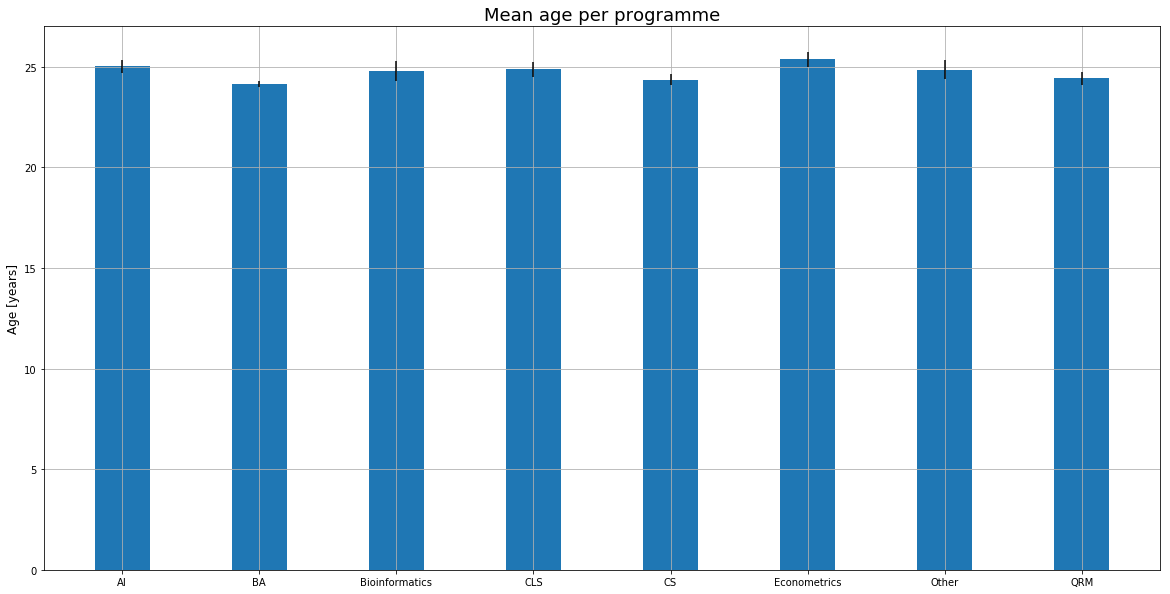

In [17]:
programme_array = np.argmax(programme.values,axis=1)
age_array = age.values

mean_age = np.empty(programme.shape[1])
std_age = np.empty(programme.shape[1])


for i in range(8):
    prog_instances = np.where(programme_array == i)
    
    mean_age[i] = age_array[prog_instances].mean()
    var_age = np.sum((age_array[prog_instances] - mean_age[i])**2) / (age_array[prog_instances].size - 1)
    std_age[i] = np.sqrt(var_age / age_array[prog_instances].size)
    

x_values = np.arange(0,2*(max(programme_array)+1),2)

plt.figure(figsize=(20,10))
plt.title("Mean age per programme",fontsize=18)
plt.ylabel("Age [years]",fontsize=12)
plt.grid(True)

plt.bar(x_values,mean_age,yerr=std_age)

plt.xticks(x_values,["AI","BA","Bioinformatics","CLS","CS","Econometrics","Other","QRM"])
plt.show()

## Percentage of course per programme

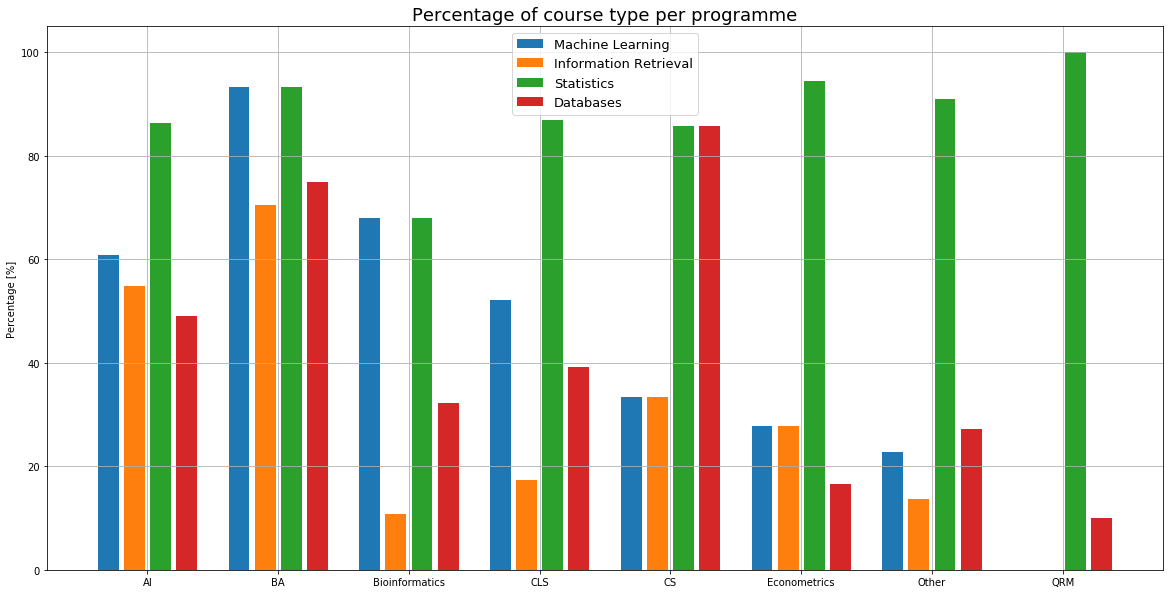

In [18]:
programme_array = np.argmax(programme.values,axis=1)
ml_array = ml["ml_yes"].values
ir_array = ir["ir_1"].values
stats_array = stats["stats_mu"].values
databases_array = databases["databases_ja"].values

programme_ml = np.empty(8)
programme_ir = np.empty(8)
programme_stats = np.empty(8)
programme_databases = np.empty(8)
for i in range(8):
    prog_instances = np.where(programme_array == i)
    
    programme_ml[i] = 100 * np.sum(ml_array[prog_instances]) / ml_array[prog_instances].size
    programme_ir[i] = 100 * np.sum(ir_array[prog_instances]) / ir_array[prog_instances].size
    programme_stats[i] = 100 * np.sum(stats_array[prog_instances]) / stats_array[prog_instances].size
    programme_databases[i] = 100 * np.sum(databases_array[prog_instances]) / databases_array[prog_instances].size
    

ml_x = np.arange(0,36,5)
ir_x = np.arange(1,37,5)
stats_x = np.arange(2,38,5)
databases_x = np.arange(3,39,5)

plt.figure(figsize=(20,10))
plt.title("Percentage of course type per programme",fontsize=18)
plt.ylabel("Percentage [%]")
plt.grid(True)

plt.bar(ml_x,programme_ml,label="Machine Learning")
plt.bar(ir_x,programme_ir,label="Information Retrieval")
plt.bar(stats_x,programme_stats,label="Statistics")
plt.bar(databases_x,programme_databases,label="Databases")

plt.xticks((ir_x + stats_x) / 2,["AI","BA","Bioinformatics","CLS","CS","Econometrics","Other","QRM"])
plt.legend(fontsize=13)
plt.show()

# Classification analysis

First we select the attributes which we want to use for our classification algorithms and the target which we want to predict using these models.

In [48]:
def flatten(X,name):
    return pd.Series(np.argmax(X.values,axis=1),name=name)

# Convert one-hot to ordinal for testing purposes
prog_ord = pd.Series(np.argmax(programme.values,axis=1),name="programme")

# prepare the inputs and targets for the algorithms

# Possible attributes: programme,ml,ir,stats,databases,gender,age,birthdate_d,
#                      birthdate_m,randLabels,good_day_length


#input_df = pd.concat([flatten(ml,"ml"),flatten(ir,"ir"),flatten(stats,"stats"), \
#                      flatten(databases,"databases"),age],axis=1)

input_df = pd.concat([ml,ir,databases],axis=1)

inputs = input_df.values
targets = np.argmax(programme.values,axis=1)

input_df.head()

,ml_no,ml_unknown,ml_yes,ir_0,ir_1,ir_unknown,databases_ja,databases_nee,databases_unknown
0,1,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,1,0,0
2,0,0,1,0,1,0,1,0,0
3,0,0,1,0,1,0,1,0,0
4,1,0,0,1,0,0,1,0,0


We first do a random prediction as a minimum performance benchmark

In [36]:
rand_prediction = np.random.randint(min(targets),max(targets),len(targets))

print("Random prediction classification rate:",len(targets[rand_prediction == targets])/len(targets))

Random prediction classification rate: 0.14285714285714285


Next we try to train two classification algorithms using these attributes in order to predict one of the attributes belonging to an instance.

We first train a naive Bayes model using a multinomial distribution for the likelihood. The score is determined using K-Fold Cross Validation.

In [49]:
def NB_find_best_alpha(m_func,n_folds,inputs,targets):
    """
    Uses Cross-Validation to find the best number of neighbors
    for the K-Nearest Neighbord algorithm.
    """
    
    best_score = 0
    best_a = None
    
    kfold = KFold(n_splits=n_folds,shuffle=True)
    for a in np.linspace(0.001,1,50):
        model = m_func(alpha=a)
        
        score_sum = 0
        for train_idx, valid_idx in kfold.split(inputs,targets):
            x_train, x_valid = inputs[train_idx], inputs[valid_idx]
            t_train, t_valid = targets[train_idx], targets[valid_idx]    
            model.fit(x_train, t_train)
            score_sum += model.score(x_valid,t_valid)
        
        avg_score = score_sum / n_folds
        
        if avg_score > best_score:
            best_score = avg_score
            best_a = a
    
    return best_a

model_function = MultinomialNB

n = 10
avg_score_train = 0
avg_score_test = 0
kfold = StratifiedKFold(n_splits=n,shuffle=True)
with tqdm.tqdm(total=n) as pbar:
    for train_idx, test_idx in kfold.split(inputs,targets):
        x_train, x_test = inputs[train_idx], inputs[test_idx]
        t_train, t_test = targets[train_idx], targets[test_idx]
    
        a = NB_find_best_alpha(model_function,n,x_train,t_train)
    
        model = model_function(alpha = a)
        model.fit(x_train, t_train)
        avg_score_train += model.score(x_train,t_train)
        avg_score_test += model.score(x_test,t_test)
        
        pbar.update()

avg_score_train /= n
avg_score_test /= n
print("Average score Naive Bayes: train = %lf, test = %lf" % (avg_score_train,avg_score_test))

100%|██████████| 10/10 [00:04<00:00,  2.34it/s]

Average score Naive Bayes: train = 0.401985, test = 0.359787


Next we train a Logistic Regression model. This time we use cross validation to find the optimal regularization parameter used by the model.

In [50]:
n = 10
avg_score_train = 0
avg_score_test = 0
kfold = StratifiedKFold(n_splits=n,shuffle=True)
with tqdm.tqdm(total=n) as pbar:
    for train_idx, test_idx in kfold.split(inputs,targets):
        x_train, x_test = inputs[train_idx], inputs[test_idx]
        t_train, t_test = targets[train_idx], targets[test_idx]

        model = LogisticRegressionCV(Cs=n,solver="newton-cg",multi_class="multinomial")
        model.fit(x_train, t_train)
    
        avg_score_train += model.score(x_train,t_train)
        avg_score_test += model.score(x_test,t_test)
        
        pbar.update()

avg_score_train /= n
avg_score_test /= n
print("Average score Logistic Regression: train = %lf, test = %lf" % (avg_score_train,avg_score_test))

100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

Average score Logistic Regression: train = 0.403446, test = 0.378067


We also try a Decision Tree Classifier

In [66]:
model = DecisionTreeClassifier()

n = 10
avg_score_train = 0
avg_score_test = 0
kfold = StratifiedKFold(n_splits=n,shuffle=True)
for train_idx, test_idx in kfold.split(inputs,targets):
    x_train, x_test = inputs[train_idx], inputs[test_idx]
    t_train, t_test = targets[train_idx], targets[test_idx]
    
    model.fit(x_train, t_train)
    avg_score_train += model.score(x_train,t_train)
    avg_score_test += model.score(x_test,t_test)

avg_score_train /= n
avg_score_test /= n
print("Average score Decision Tree: train = %lf, test = %lf" % (avg_score_train,avg_score_test))

Average score Decision Tree: train = 0.416808, test = 0.377054


Try a K-nearest neighbors classifier

In [57]:
def knn_find_best_k(n_folds,inputs,targets):
    """
    Uses Cross-Validation to find the best number of neighbors
    for the K-Nearest Neighbord algorithm.
    """
    
    best_score = 0
    best_k = None
    
    kfold = KFold(n_splits=n_folds,shuffle=True)
    for k in np.arange(1,51):
        model = KNeighborsClassifier(n_neighbors=k)
        
        score_sum = 0
        for train_idx, valid_idx in kfold.split(inputs,targets):
            x_train, x_valid = inputs[train_idx], inputs[valid_idx]
            t_train, t_valid = targets[train_idx], targets[valid_idx]    
            model.fit(x_train, t_train)
            score_sum += model.score(x_valid,t_valid)
        
        avg_score = score_sum / n_folds
        
        if avg_score > best_score:
            best_score = avg_score
            best_k = k
    
    return best_k

# Number of folds for each CV loop
n_outer = 10
n_inner = n_outer

sum_score_train = 0
sum_score_test = 0
kfold = StratifiedKFold(n_splits=n_outer,shuffle=True)
with tqdm.tqdm(total=n) as pbar:
    for train_idx, test_idx in kfold.split(inputs,targets):
        x_train, x_test = inputs[train_idx], inputs[test_idx]
        t_train, t_test = targets[train_idx], targets[test_idx]
        
        k = knn_find_best_k(n_inner,x_train,t_train)
    
        model = KNeighborsClassifier(n_neighbors=k)
    
        model.fit(x_train, t_train)
        sum_score_train += model.score(x_train,t_train)
        sum_score_test += model.score(x_test,t_test)
        
        pbar.update()

avg_score_train = sum_score_train / n
avg_score_test = sum_score_test / n
print("Average score K-Nearest neighbors: train = %lf, test = %lf" % (avg_score_train,avg_score_test))

100%|██████████| 10/10 [00:05<00:00,  2.00it/s]

Average score K-Nearest neighbors: train = 0.388171, test = 0.364611
